## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
df= pd.read_csv("diabetes.csv")

 Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1)


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# dataset contain 9 columns and 768 rows.
# 2 columns are of float datatype and 7 columns are of int datatype.

## checking null values in the dataset

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# There are not null value present in our datset.

## Printing Basic Statistical information about dataset:

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Boxplot for outlier Visualization

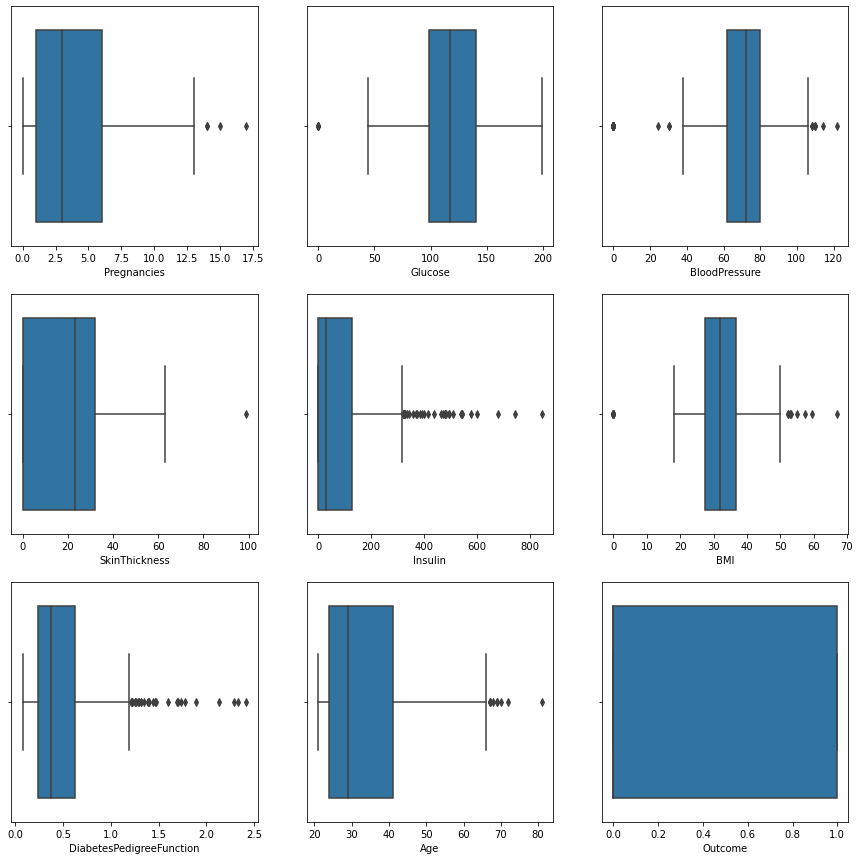

In [9]:
plt.figure(figsize= (15,15))
for i in enumerate(df.columns):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])
plt.show()

In [10]:
 #There are some outlier present in our dataset. so will remove outliers using IQR method

In [11]:
def remove_outliers_iqr(df, k=1.5):
    df_no_ouliters= df.copy()

    for column in df_no_ouliters.columns:
        q1 = df_no_ouliters[column].quantile(0.25)
        q3 = df_no_ouliters[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        df_no_ouliters = df_no_ouliters[(df_no_ouliters[column] >= lower_bound) & (df_no_ouliters[column] <= upper_bound)]
    return df_no_ouliters
    

        
        

In [12]:
df_no_ouliters=remove_outliers_iqr(df)

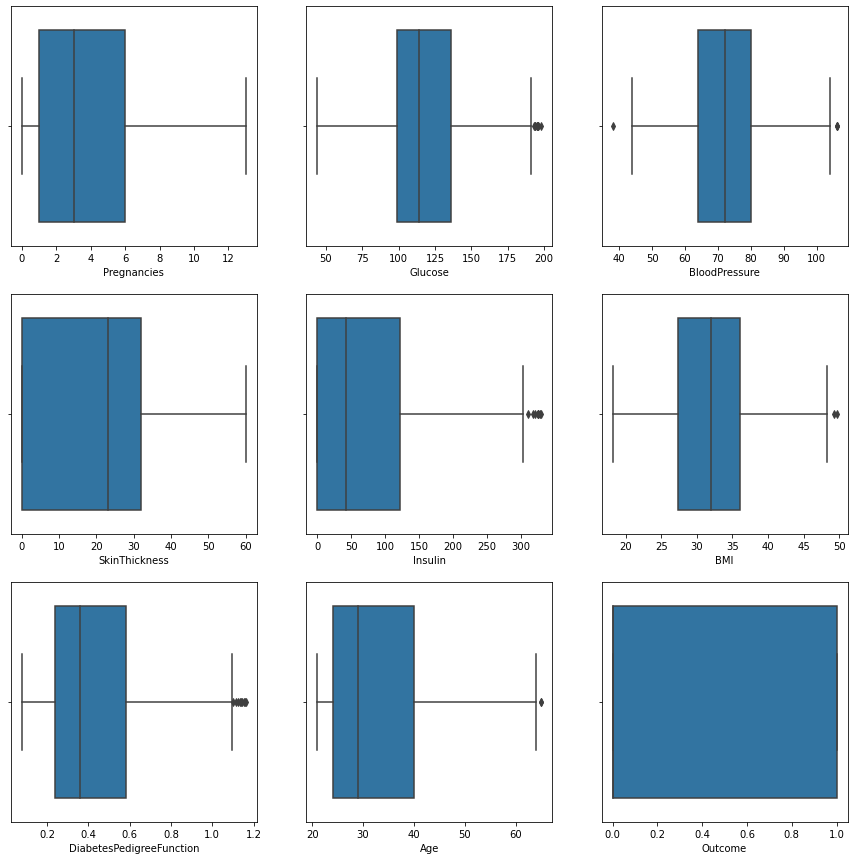

In [13]:
plt.figure(figsize= (15,15))
for i in enumerate(df_no_ouliters.columns):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df_no_ouliters[i[1]])
plt.show()

In [14]:
df_no_ouliters.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.869497,72.007862,20.745283,69.017296,31.964151,0.426237,32.555031,0.309748
std,3.251388,28.996773,11.301102,15.231688,83.601857,6.384132,0.245088,10.879807,0.462754
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,136.250000,80.000000,32.000000,122.000000,36.000000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,65.000000,1.000000


## Exploratory Data Analysis

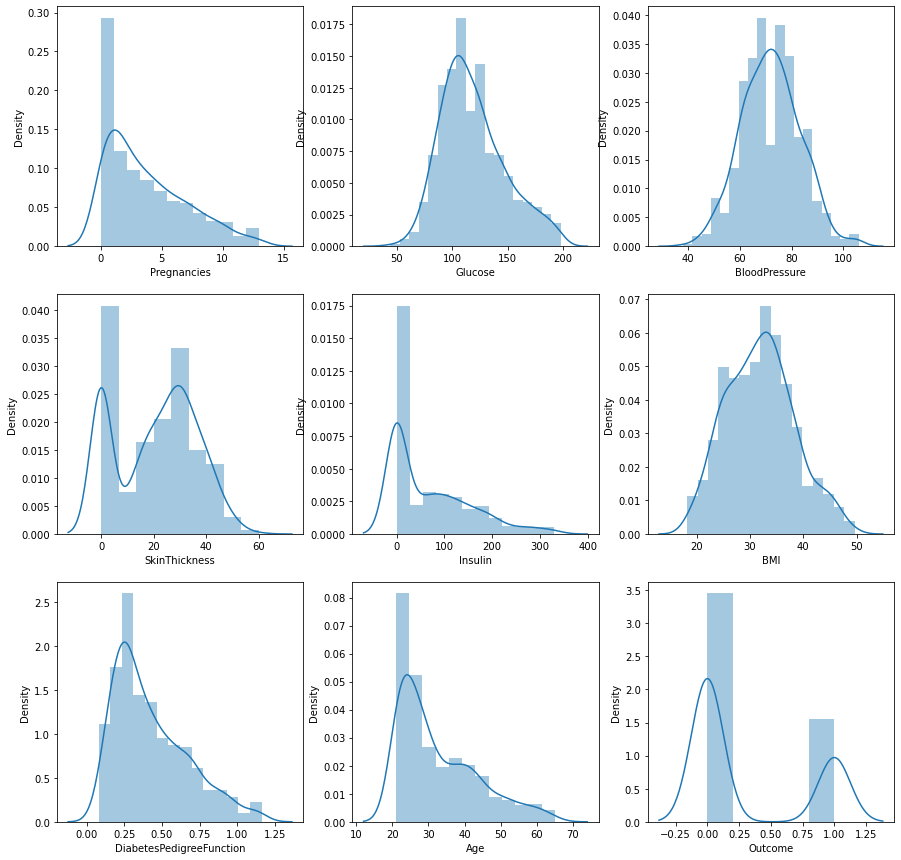

In [15]:
#Distribution of columns using Histogram
plt.figure(figsize= (15,15))
for i in enumerate(df_no_ouliters.columns):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df_no_ouliters[i[1]])
plt.show()

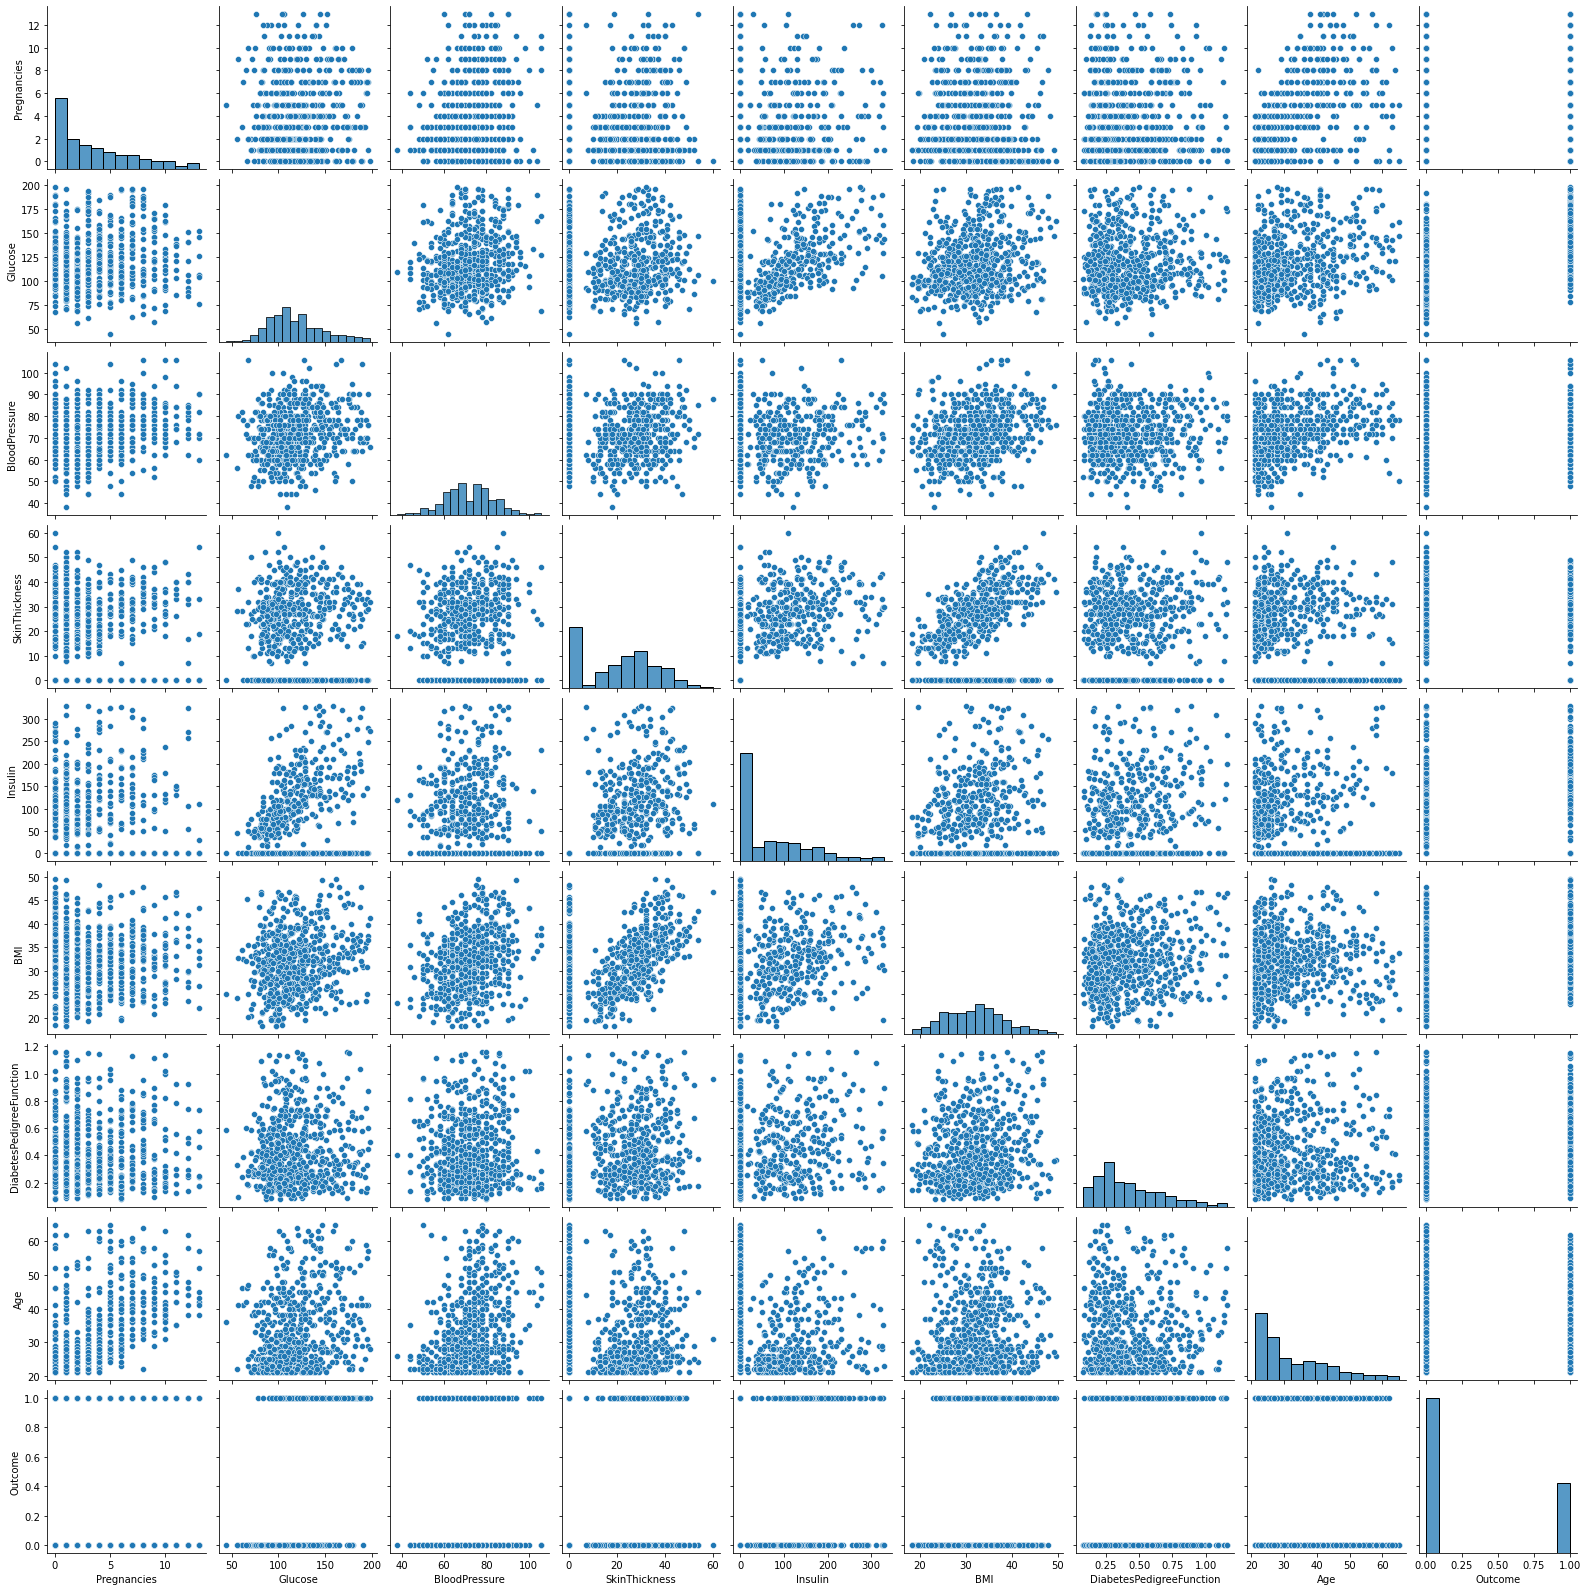

In [16]:
sns.pairplot(df_no_ouliters)

## Separating X and y

In [17]:
x= df.drop("Outcome", axis= 1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y= df.iloc[:, -1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Distribution of Outcome column

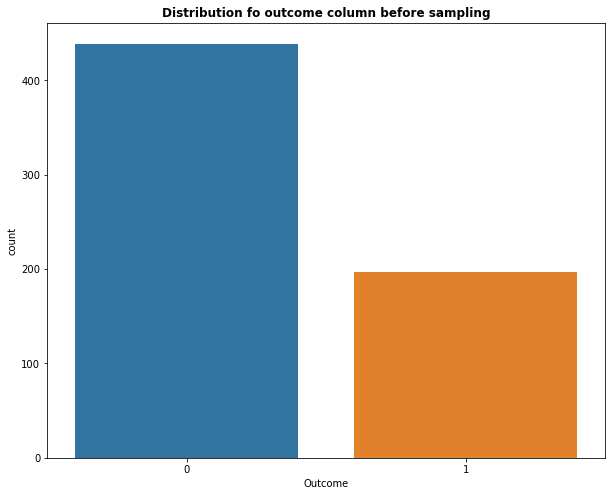

In [19]:
plt.figure(figsize= (10,8))
sns.countplot(df_no_ouliters["Outcome"])
plt.title("Distribution fo outcome column before sampling", ha='center', fontweight='bold')
plt.show()

In [20]:
# outcome is is imbalacnce. so will do oversampling.

## OverSampling

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

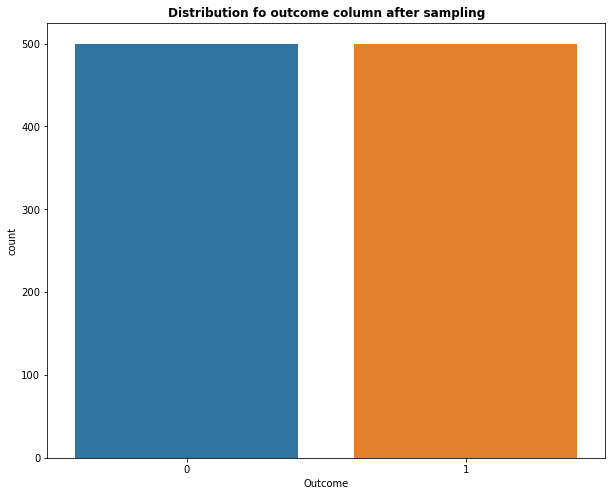

In [23]:
plt.figure(figsize= (10,8))
sns.countplot(y_resampled)
plt.title("Distribution fo outcome column after sampling", ha='center', fontweight='bold')
plt.show()

## Splitting Data for Model Training and testing:

In [24]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [25]:
xtrain, xtest, ytrain, ytest= train_test_split(x_resampled, y_resampled, random_state= 123, test_size= 0.20)

In [26]:
print(xtrain.shape , ytrain.shape)

(800, 8) (800,)


In [27]:
print(xtest.shape , ytest.shape)

(200, 8) (200,)


## Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc= StandardScaler()
xtrain1= sc.fit_transform(xtrain)
xtest1= sc.fit_transform(xtest)

## Model Building

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, log_loss

In [31]:
Training_score =[]
testing_score=[]
def model_build(model):
    model.fit(xtrain, ytrain)
    ytrain_pred= model.predict(xtrain)
    ytest_pred= model.predict(xtest)
    a = accuracy_score(ytrain, ytrain_pred)
    b = accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    testing_score.append(b)
    print("Training Data:\n", classification_report(ytrain, ytrain_pred))
    print("Testing Data:\n", classification_report(ytest, ytest_pred))
    
def s_model_build(model):
    model.fit(xtrain1, ytrain)
    ytrain_pred= model.predict(xtrain1)
    ytest_pred= model.predict(xtest1)
    a = accuracy_score(ytrain, ytrain_pred)
    b = accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    testing_score.append(b)
    print("Training Data:\n", classification_report(ytrain, ytrain_pred))
    print("Testing Data:\n", classification_report(ytest, ytest_pred))

In [32]:
def roc_auc_curve(model):
    ytest_proba= model.predict_proba(xtest)
    fpr, tpr, threshold=roc_curve(ytest,ytest_proba[:, -1])
    roc_score= roc_auc_score(ytest, ytest_proba[:, -1])
    sns.lineplot(x=fpr, y= tpr)
    sns.lineplot(x= [0.0, 1.0], y=[0.0, 1.0],color="red", linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC-AUC Curve", fontweight="black", pad=20,size = 15)
    print(roc_score)
def s_roc_auc_curve(model):
    ytest_proba= model.predict_proba(xtest1)
    fpr, tpr, threshold=roc_curve(ytest,ytest_proba[:, -1])
    roc_score= roc_auc_score(ytest, ytest_proba[:, -1])
    sns.lineplot(x=fpr, y= tpr)
    sns.lineplot(x= [0.0, 1.0], y=[0.0, 1.0],color="red", linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC-AUC Curve", fontweight="black", pad=20,size = 15)
    print(roc_score)

In [33]:
log_l= []
def calculate_logloss(model):
    print("logloss")
    ytest_proba= model.predict_proba(xtest)
    logloss=log_loss(ytest, ytest_proba[:, -1])
    log_l.append(logloss)
    return logloss

def scalculate_logloss(model):
    print("logloss")
    ytest_proba= model.predict_proba(xtest1)
    logloss=log_loss(ytest, ytest_proba[:, -1])
    log_l.append(logloss)
    return logloss
    

In [34]:
lr = LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
svm= SVC(probability=True, kernel="linear")

## Logistic Regression Model

Training Data:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       402
           1       0.76      0.73      0.74       398

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

Testing Data:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        98
           1       0.71      0.73      0.72       102

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

0.8272308923569428
logloss


0.5018018006470691

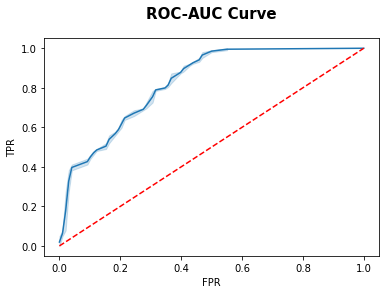

In [35]:
s_model_build(lr)
s_roc_auc_curve(lr)
scalculate_logloss(lr)

## Decision Tree Algorithm

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Testing Data:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69        98
           1       0.69      0.82      0.75       102

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200

0.7229891956782714
logloss


9.498311434125025

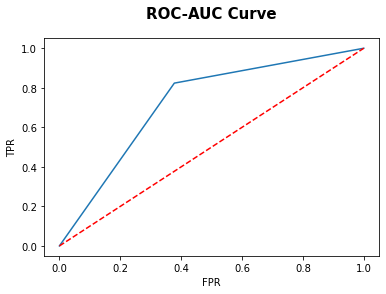

In [36]:
model_build(dt)
roc_auc_curve(dt)
calculate_logloss(dt)

## Random Forest Algorithm

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Testing Data:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79        98
           1       0.77      0.93      0.84       102

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.82       200
weighted avg       0.84      0.82      0.82       200

0.8817527010804321
logloss


0.4259672412735936

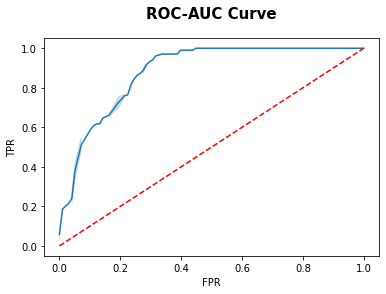

In [37]:
model_build(rf)
roc_auc_curve(rf)
calculate_logloss(rf)

## Support Vector Machine Algorithm

Training Data:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       402
           1       0.78      0.72      0.75       398

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800

Testing Data:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        98
           1       0.72      0.72      0.72       102

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.72      0.71      0.72       200

0.8268307322929171
logloss


0.5026885547356634

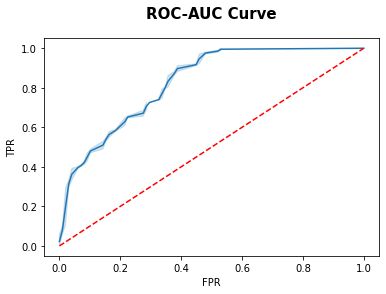

In [38]:
s_model_build(svm)
s_roc_auc_curve(svm)
scalculate_logloss(svm)

In [39]:
score = pd.DataFrame({"Model":["Logistic Regression",  "DecisionTree Classifier", "Random Forest", "SVM"],
                   "Traning Accuracy": Training_score,
                   "Testing Accuracy": testing_score,
                   "logloss":log_l})

In [40]:
score

,Model,Traning Accuracy,Testing Accuracy,logloss
0,Logistic Regression,0.75125,0.710,0.501802
1,DecisionTree Classifier,1.00000,0.725,9.498311
2,Random Forest,1.00000,0.820,0.425967
3,SVM,0.76000,0.715,0.502689


In [213]:
# selecting Logistic Regression as my final model as it is not overfitted

## Hyperparameter Tuning of Logistic Regression

In [111]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],   # Regularization strength
    'penalty': ['l1', 'l2'],                    # L1 (Lasso) or L2 (Ridge) penalty
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  # Optimization algorithm
    'max_iter': [50, 100, 200, 500]             # Maximum number of iterations
}

In [112]:
scoring = {
    'accuracy': make_scorer(accuracy_score)
}

In [113]:
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid,
    scoring=scoring,
    refit='accuracy',  # Choose accuracy as the primary metric for model selection
    cv=5,             # 5-fold cross-validation
    n_iter=50,        # Number of parameter settings that are sampled
    n_jobs=-1,        # Use all available CPU cores for parallel computation
    random_state=42,
)

In [114]:
random_search.fit(xtrain1 , ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0],
                                        'max_iter': [50, 100, 200, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'lbfgs', 'sag', 'saga']},
                   random_state=42, refit='accuracy',
                   scoring={'accuracy': make_scorer(accuracy_score)})

In [116]:
best_hyperparams = random_search.best_params_
best_model = random_search.best_estimator_

In [118]:
print("Best Hyperparameters:", best_hyperparams)
print("Best Training Accuracy:", random_search.best_score_)
print("Best Testing Accuracy:", accuracy_score(ytest, best_model.predict(xtest1)))

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 50, 'C': 1.0}
Best Training Accuracy: 0.7525000000000001
Best Testing Accuracy: 0.71


In [214]:
# After doning hyperparameter tuning it is giving same result

In [215]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# prediction

In [237]:
a = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]

In [238]:
a_st= sc.transform(a)

In [239]:
lr.predict(a_st)

array([1], dtype=int64)

In [244]:
a = [[1, 89, 66, 23,94, 28.1, 0.167, 21]]

In [245]:
a_st= sc.transform(a)

In [250]:
lr.predict(a_st)[0]

0

In [247]:
a = [[1, 100, 90, 23,120, 27, 0.6, 30]]

In [248]:
a_st= sc.transform(a)

In [252]:
prediction=lr.predict(a_st)[0]

In [253]:
prediction

0

In [254]:
if (prediction== 1):
    print("The person is Diabetic")
else:
    print("The person is not Diabetic")

The person is not Diabetic


In [255]:
import pickle

In [256]:
pickle.dump(lr, open("model.pkl", "wb"))

In [257]:
pickle.dump(sc, open("scaling.pkl", "wb"))

In [2]:
import sklearn
print(sklearn.__version__)

1.0.2
